<a href="https://colab.research.google.com/github/NPrasanna0808/BudgetWise-AI-based-Expense-Forecasting-Tool/blob/main/Budget_wise_AI_Based_expense_forecasting_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')


In [4]:
# Load the dataset
data = pd.read_csv("Expenses_dataset.csv")
print("Dataset Loaded Successfully!")
print("Shape of Dataset:", data.shape)
data.size

Dataset Loaded Successfully!
Shape of Dataset: (50000, 12)


600000

**Dataset Description**

This dataset  shows how users spend and manage their money. Each record represents one transaction made by a user and includes details like the date, amount, category (such as food, travel, or bills), payment mode, and account type.The data includes both expenses and income, making it useful for understanding spending patterns, comparing expenses between users, and predicting future expenses. Overall, it gives a clear view of users’ financial behavior over time.

In [5]:
# Display the first few rows
print("Dataset Preview:")
display(data.head(10))

Dataset Preview:


,Date,Day,Location,User_ID,income,Transaction_ID,Category,Description,Expense_Type,Payment_Mode,Account_Type,Amount
0,31-07-2025,Tuesday,Delhi,u0004,33669.0,NaN,Shopping,Movie ticket,Fixed,Credit Card,Wallet,1373.36
1,09-09-2025,Sunday,Bangalore,u0004,33669.0,TXN-0902,Bills,Medicine,Fixed,UPI,NaN,3089.74
2,02-04-2025,Friday,Delhi,u0002,20969.0,TXN-0812,Shopping,Water Bill,NaN,Cash,Savings,3611.74
3,10-03-2025,Friday,Chennai,u0004,33669.0,NaN,Bills,Internet Bill,NaN,UPI,Savings,3306.46
4,24-01-2025,Thursday,NaN,u0005,20203.0,TXN-0446,Others,Hotel,Fixed,Credit Card,Wallet,5035.97
5,29-01-2025,Sunday,NaN,u0004,33669.0,TXN-0913,Food,Course fee,Variable,Debit Card,Savings,26.28
6,19-05-2025,NaN,Delhi,u0003,28301.0,TXN-0231,Health,Gym,Fixed,UPI,Savings,411.11
7,03-08-2025,Saturday,Hyderabad,u0005,20203.0,TXN-0364,Health,Cab fare,Fixed,Debit Card,Wallet,3905.28
8,29-01-2025,Wednesday,NaN,u0005,20203.0,TXN-0554,Travel,Concert,Variable,UPI,Credit,1159.11
9,31-07-2025,Sunday,Mumbai,u_missing_1,NaN,NaN,Health,Clothes,Variable,Debit Card,Wallet,NaN


In [6]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Check for missing values
print("Missing Values per Column:")
print(data.isnull().sum())

# Handle missing values
data = data.dropna()

# Convert 'Amount' to numeric
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

print("\nData Preprocessing Completed!")
print("Data Types:")
print(data.dtypes)


Missing Values per Column:
Date              5049
Day               5024
Location          4984
User_ID              0
income            4939
Transaction_ID    5148
Category          5069
Description       4850
Expense_Type      4919
Payment_Mode      4944
Account_Type      5023
Amount            4995
dtype: int64

Data Preprocessing Completed!
Data Types:
Date              datetime64[ns]
Day                       object
Location                  object
User_ID                   object
income                   float64
Transaction_ID            object
Category                  object
Description               object
Expense_Type              object
Payment_Mode              object
Account_Type              object
Amount                   float64
dtype: object


In [7]:
total_expense = data['Amount'].sum()
average_expense = data['Amount'].mean()

print(f"Total Expense: {total_expense:.2f}")
print(f"Average Expense: {average_expense:.2f}")


Total Expense: 39985344.99
Average Expense: 2551.88


In [8]:
# Group by Category
category_summary = data.groupby('Category')['Amount'].agg(['sum', 'mean', 'count']).reset_index()
category_summary.columns = ['Category', 'Total_Expense', 'Average_Expense', 'Transactions']

print("Category-wise Summary:")
display(category_summary.sort_values(by='Total_Expense', ascending=False))


Category-wise Summary:


,Category,Total_Expense,Average_Expense,Transactions
6,Shopping,4657357.27,2588.858961,1799
0,Bills,4656264.27,2540.242373,1833
5,Others,4580782.37,2561.958820,1788
2,Entertainment,4503470.40,2501.928000,1800
8,Travel,4387658.41,2546.522583,1723
1,Education,4338896.88,2576.542090,1684
4,Health,4318615.10,2567.547622,1682
7,Transport,4311354.38,2510.981002,1717
3,Food,4230945.91,2575.134455,1643


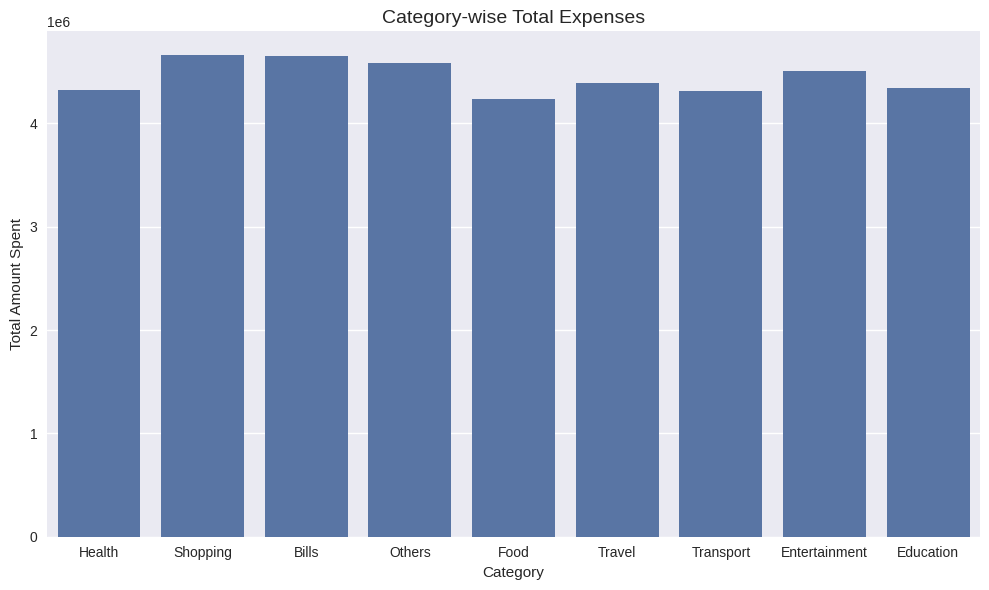

In [9]:
# Plot total expense by category
plt.figure(figsize=(10,6))
sns.barplot( x='Category', y='Amount', data=data, estimator=sum,errorbar=None )
plt.title("Category-wise Total Expenses", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()


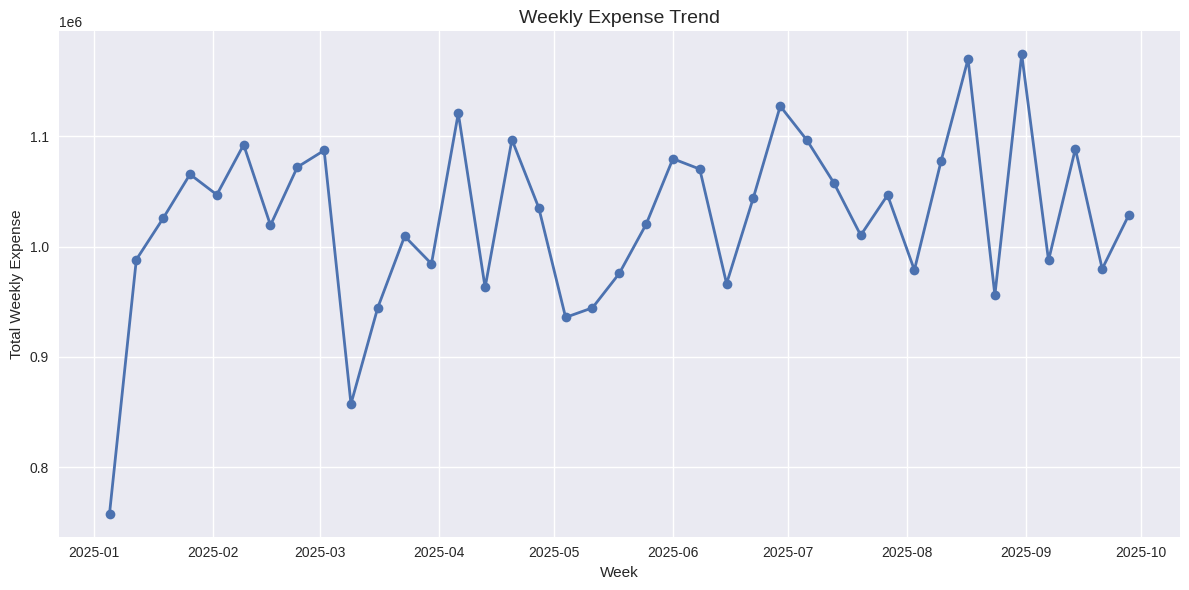

In [10]:

weekly_trend = data.groupby(pd.Grouper(key='Date', freq='W'))['Amount'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(weekly_trend['Date'], weekly_trend['Amount'], marker='o', linewidth=2)
plt.title("Weekly Expense Trend", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Total Weekly Expense")
plt.grid(True)
plt.tight_layout()
plt.show()
